In [1]:
import sys
try:
    del sys.modules["spnhelp"]
except:
    pass
import spnhelp
try:
    del sys.modules["clg_revised"]
except:
    pass
from clg_revised import noise
from math import sqrt
from spn.io.Text import spn_to_str_equation
import pandas as pd
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
from spn.algorithms.Marginalization import marginalize
from spn.algorithms.Inference import likelihood 
import scipy.stats as stats

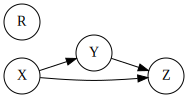

In [2]:
X = "X" @ (noise + 1)
Y = "Y" @ (X + noise)
Z = "Z" @ (Y + X + noise)

R = "R" @ (1 + noise)

X & R

X.get_graph() 

In [3]:
x = X.deepcopy()
X.condition(5)
print(X.get_Σ())
print(X.get_μ())

x.condition(-4)
print(x.get_Σ())
print(x.get_μ())

print(X.get_Σ())
print(X.get_μ())

     X    Y    Z
X  0.0  0.0  0.0
Y  0.0  1.0  1.0
Z  0.0  1.0  2.0
X     5.0
Y     5.0
Z    10.0
dtype: float64
     X    Y    Z
X  0.0  0.0  0.0
Y  0.0  1.0  1.0
Z  0.0  1.0  2.0
X   -4.0
Y   -4.0
Z   -8.0
dtype: float64
     X    Y    Z
X  0.0  0.0  0.0
Y  0.0  1.0  1.0
Z  0.0  1.0  2.0
X     5.0
Y     5.0
Z    10.0
dtype: float64


     X    Y    Z
X  1.0  1.0  2.0
Y  1.0  2.0  3.0
Z  2.0  3.0  6.0


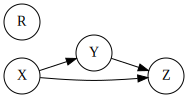

In [9]:
X_c = Z.deepcopy(copy_factors=True)[0]
X.condition(1)
print(X_c.get_Σ())
X_c.get_graph()


In [10]:
print(X_c.get_scope())
X_c.castrate_roots()

['X', 'Y', 'Z']


Z ~ N(2.0, 6.0)